### Pima Indians diabetes dataset

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = pd.read_csv("diabetes.csv")

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

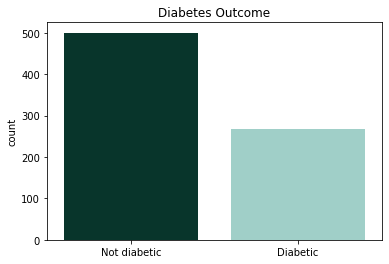

In [71]:
colors = ["#003c30","#98d7cd" ]
sns.set_palette(sns.color_palette(colors))
f = sns.countplot(x='Outcome', data=df)
f.set_title("Diabetes Outcome")
f.set_xticklabels(['Not diabetic', 'Diabetic'])
plt.xlabel("");

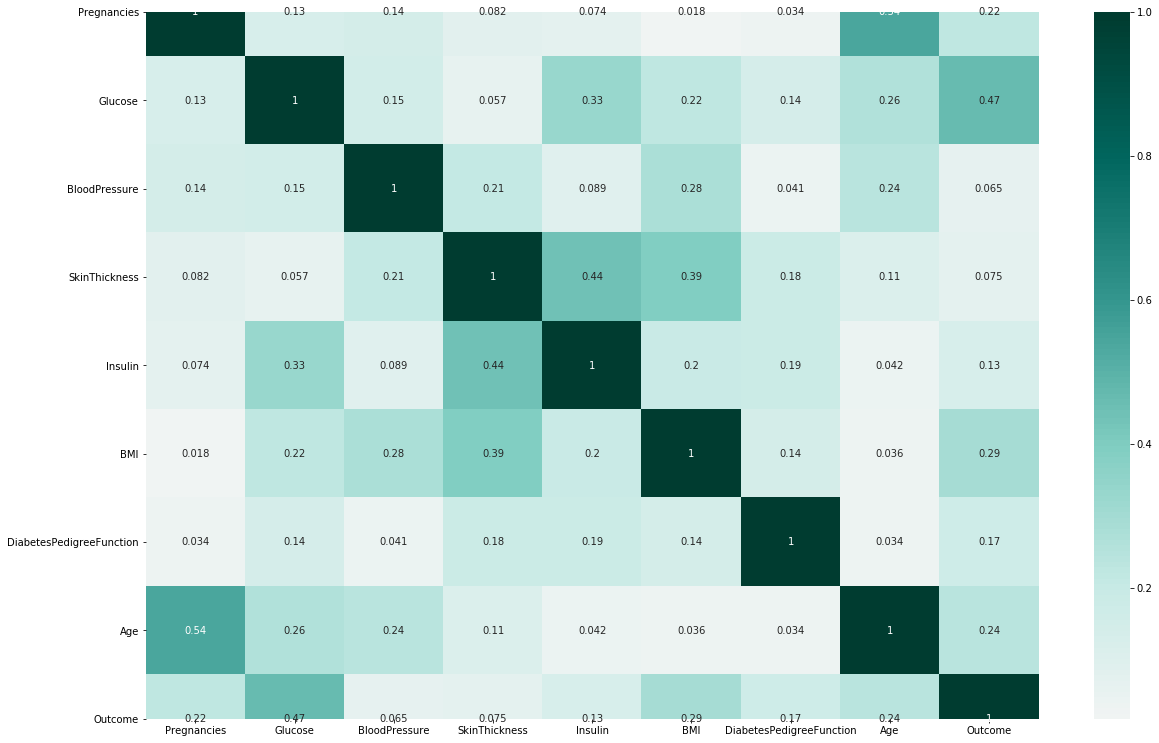

In [19]:

corr = df.corr()
ig, ax = plt.subplots(figsize=(20,13))    
sns.cubehelix_palette(as_cmap=True)

sns.heatmap(df.corr().abs(),  annot=True, cmap = "BrBG", center = 0 )

In [51]:
corr[abs(corr['Outcome']) < 0.1].index

Index(['BloodPressure', 'SkinThickness'], dtype='object')

In [9]:
x=df[['Pregnancies', 'Glucose', 
       'BMI', 'DiabetesPedigreeFunction', 'Age',]]
y=df['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)


In [10]:
clf = KNeighborsClassifier()
model = clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, Y_test)
accuracy

0.7708333333333334